<a href="https://colab.research.google.com/github/achy13/ML/blob/main/HeartDiseasePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Поставување јасна цел**

Целта на овој проект е да се тренира модел од машинско учење кој може да предвиди дали пациент има срцева болест или не, базирано на различни медицински параметри. Ова претставува задача за бинарна класификација (има/нема срцева болест).

# **2. Собирање на податоци**
Податоците се преземени од Cleveland Heart Disease dataset, кој е дел од UCI Machine Learning Repository.

URL до податоците: [Cleveland Heart Disease Dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data)

Број на променливи: 13 (влезни карактеристики) + 1 (целна променлива - дијагноза на болест)

Колоните во податочното множество се:

age = возраст на пациентот

sex = Пол (1 = машки, 0 = женски)

cp = тип на болка во градите (1-4)


1.   typical angina
2.   atypical angina
3. non-anginal pain
4. asymptomatic

trestbps = крвен притисок во мирување

chol = ниво на холестерол

fbs = шеќер во крвта (1 = високо, 0 = нормално)

restecg = резултат од електрокардиограм

thalach = максимален пулс

exang = ангина предизвикана од вежбање (1 = да, 0 = не)

oldpeak = 	намалување на ST сегментот (исхемија)

slope = наклон на ST сегментот

ca = број на големи садови со калцификација

thal = Тип на thalassemia (1-3)

target = Присуство на срцева болест

*  	0: < 50% нама присуство на срцева болест

*   1–4: > 50% има срцева болест





# **3. Подготовка на податоците**

# 3.1 Вклучување на потребни библиотеки

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 3. 2 Читање на податоците

In [55]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
data = pd.read_csv(data_url, names=columns, na_values="?")

# 3. 3 Анализа и визуелизација на податоците

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [57]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [58]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [59]:
# Чистење на податоците кои содржат null вредности
data.dropna(inplace=True)

# Претворање таргет вредностите во бинарни
data["target"] = data["target"].apply(lambda x: 1 if x > 0 else 0)

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  target    297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB


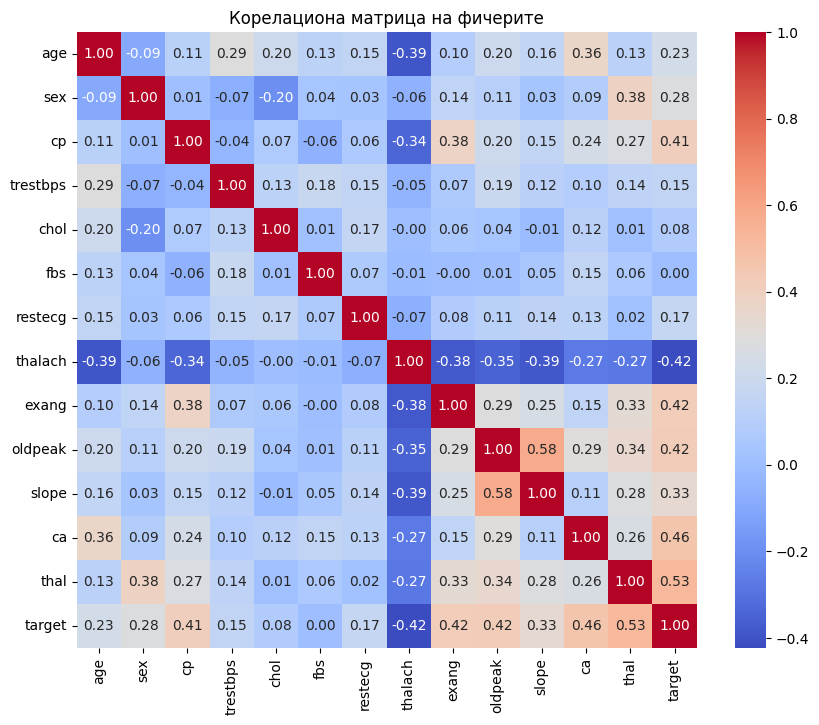

In [61]:
# Визуелизација
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корелациона матрица на фичерите")
plt.show()

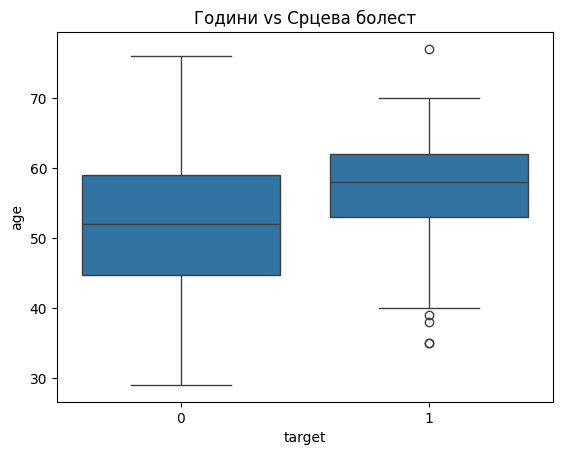

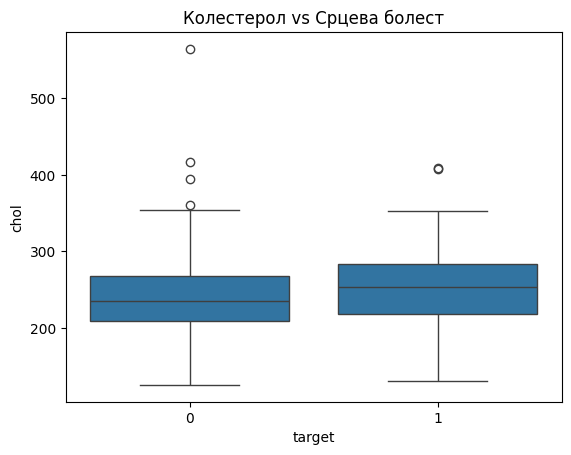

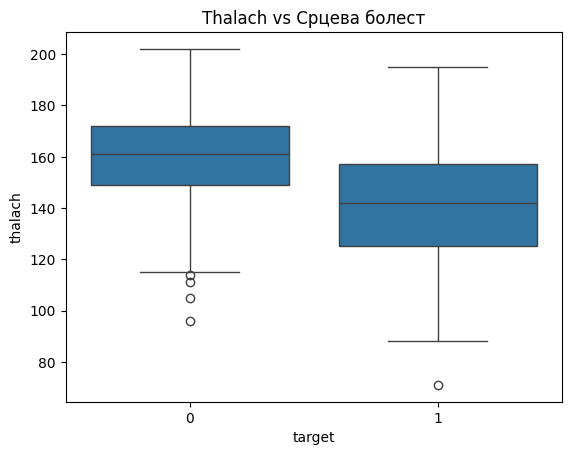

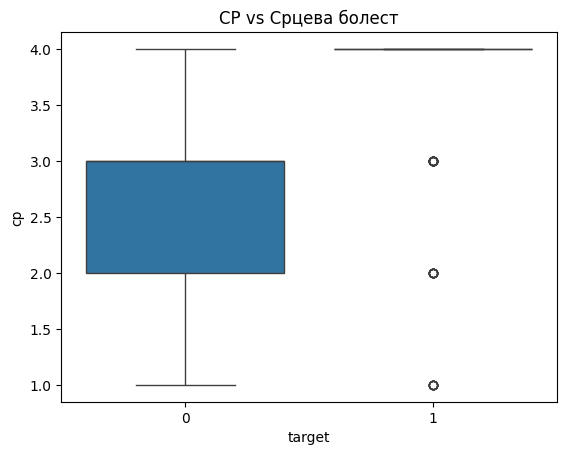

In [62]:
sns.boxplot(x=data["target"], y=data["age"])
plt.title("Години vs Срцева болест")
plt.show()

sns.boxplot(x=data["target"], y=data["chol"])
plt.title("Колестерол vs Срцева болест")
plt.show()

sns.boxplot(x=data["target"], y=data["thalach"])
plt.title("Thalach vs Срцева болест")
plt.show()

sns.boxplot(x=data["target"], y=data["cp"])
plt.title("CP vs Срцева болест")
plt.show()

# **4. Подготовка на податоците**

# 4. 1 Нормализација на податоците

In [63]:
X = data.drop(columns=["target"])
y = data["target"]
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 4. 2 Поделба на податоците на тренирачко и тестирачко множество

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **5. Избирање на модел**

# 5. 1 Функција за вачидација

In [75]:
accuracies = []
models = []
def validate(y_pred, model_name):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    models.append(model_name)
    accuracies.append(acc)

    print(f"{model_name} Results:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}\n")

# 5. 2 Logistic Regression

In [76]:
log_reg = LogisticRegression(max_iter=5000)
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
validate(log_reg_pred, "Logistic Regression")

Logistic Regression Results:
Accuracy: 0.8667
Precision: 0.8333
Recall: 0.8333
F1-score: 0.8333



# 5. 3 Decision Tree

In [77]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
decision_tree_pred = decision_tree.predict(X_test)
validate(decision_tree_pred, "Decision Tree")

Decision Tree Results:
Accuracy: 0.8333
Precision: 0.7500
Recall: 0.8750
F1-score: 0.8077



In [34]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [3, 5, 10, None],  # Колку да биде длабоко дрвото
    'min_samples_split': [2, 5, 10],  # Минимален број примери за делење
    'min_samples_leaf': [1, 2, 5],  # Минимален број примери во лист
    'criterion': ['gini', 'entropy']  # Критериум за одлука
}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Decision Tree Parameters:", grid.best_params_)


Best Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}


Резултатот кој го добиваме за најдобри параметри би можело да доведе до overfittin и затоа сепак ќе треба да пробуваме со вредностите за максимална длабочина и минимум листови.

In [78]:
best_dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,
    min_samples_leaf=5,
    min_samples_split=2
)

best_dt.fit(X_train, y_train)
y_pred_dt = best_dt.predict(X_test)
validate(y_pred_dt, "DT-GridSearch")


DT-GridSearch Results:
Accuracy: 0.8000
Precision: 0.7143
Recall: 0.8333
F1-score: 0.7692



# 5. 4 Random Forest

In [79]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
random_forest_pred = random_forest.predict(X_test)
validate(random_forest_pred, "Random Forest")

Random Forest Results:
Accuracy: 0.8667
Precision: 0.8636
Recall: 0.7917
F1-score: 0.8261



In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Конфигурирај ги параметрите што сакаш да ги истражуваш
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2', None]
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters: {'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [80]:
# Креирање на моделот со најдобрите параметри добиени од GridSearchCV
best_rf = RandomForestClassifier(
    max_depth=5,
    max_features='log2',
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=200
)
best_rf.fit(X_train, y_train)
y_pred_rf = best_rf.predict(X_test)
validate(y_pred_rf, "RF-Best param")

RF-Best param Results:
Accuracy: 0.8667
Precision: 0.8333
Recall: 0.8333
F1-score: 0.8333



# 5. 5 SVM

In [82]:
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
validate(svm_pred, "SVM")

SVM Results:
Accuracy: 0.8833
Precision: 0.8696
Recall: 0.8333
F1-score: 0.8511



Пронаоѓање на најдобрите параметри за SVM

In [83]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}
grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best SVM parameters:", grid.best_params_)

Best SVM parameters: {'C': 0.1, 'kernel': 'rbf'}


In [84]:
svm_best = SVC(C=0.1, kernel='rbf')
svm_best.fit(X_train, y_train)
svm_best_pred = svm_best.predict(X_test)
validate(svm_best_pred, "SVM - best param")

SVM - best param Results:
Accuracy: 0.9000
Precision: 0.8750
Recall: 0.8750
F1-score: 0.8750



# 5. 6 Neural Network

In [85]:
neural_network = MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=400)
neural_network.fit(X_train, y_train)
nn_pred = neural_network.predict(X_test)
validate(nn_pred, "Neural Network")

Neural Network Results:
Accuracy: 0.8667
Precision: 0.8333
Recall: 0.8333
F1-score: 0.8333



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


# **6. Еваулација**



*   **SVM (best param)** постигна најдобри резултати, што покажува дека оптимизацијата на параметрите значително ја подобрува неговата предиктивна моќ.
*   **SVM без оптимизација** исто така покажа солидни резултати (Accuracy = 0.8833), што го прави добар избор.
*   **Logistic Regression, Random Forest (RF), и Neural Network** имаат слични перформанси (Accuracy = 0.8667), но Random Forest има највисока Precision (0.8636).
*   **Decision Tree со GridSearch** (DT-GridSearch) има најниска точност (0.8000), што покажува дека оптимизацијата на DT не донесе значително подобрување.
*  **Decision Tree без GridSearch** има повисок Recall (0.8750), што може да биде корисно ако моделот треба да детектира повеќе позитивни случаи.




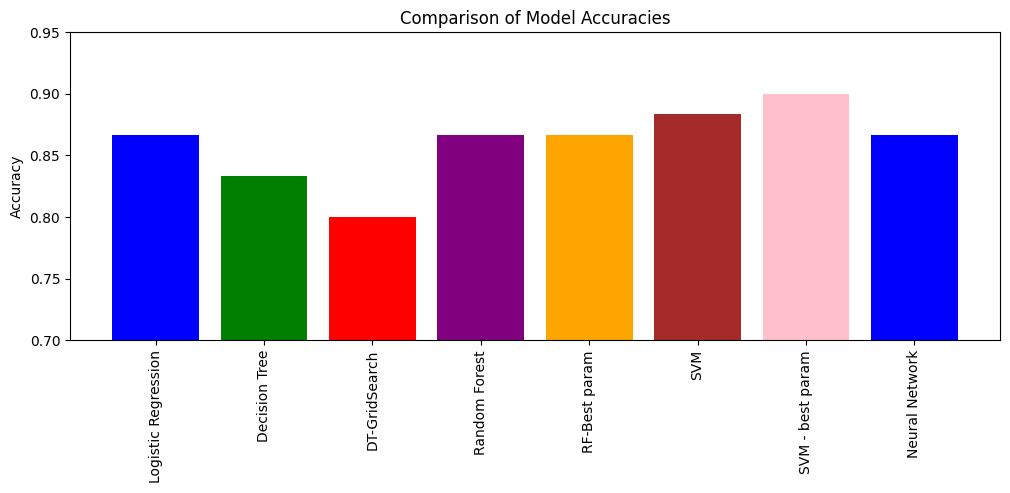

In [87]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple', 'orange', 'yellow', 'brown', 'pink'])
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies")
plt.ylim(0.70, 0.95)
plt.xticks(rotation=90)
plt.show()